Output()

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    3.390  0.219   2.982    3.810      0.006    0.005    1156.0   
beta     1.703  0.032   1.645    1.766      0.001    0.001    1173.0   
epsilon  0.406  0.074   0.282    0.535      0.002    0.002    1806.0   

         ess_tail  r_hat  
alpha      1283.0    1.0  
beta       1450.0    1.0  
epsilon    1500.0    1.0  


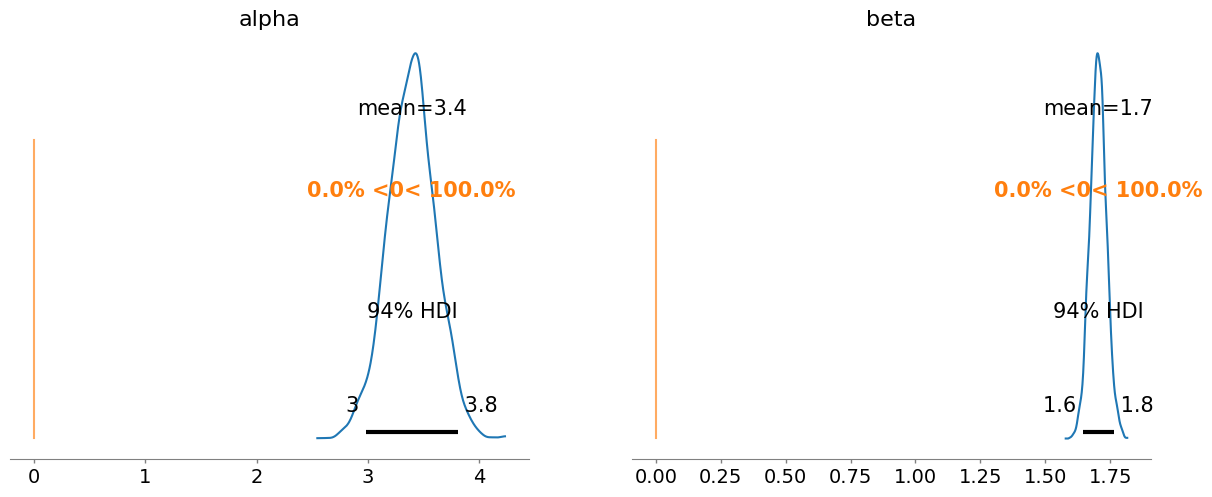

Pentru publicitate = 12.0:
 -> Venit estimat (medie): 23.83
 -> Interval HDI: [23.4426328  24.22296738]


/usr/local/lib/python3.12/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


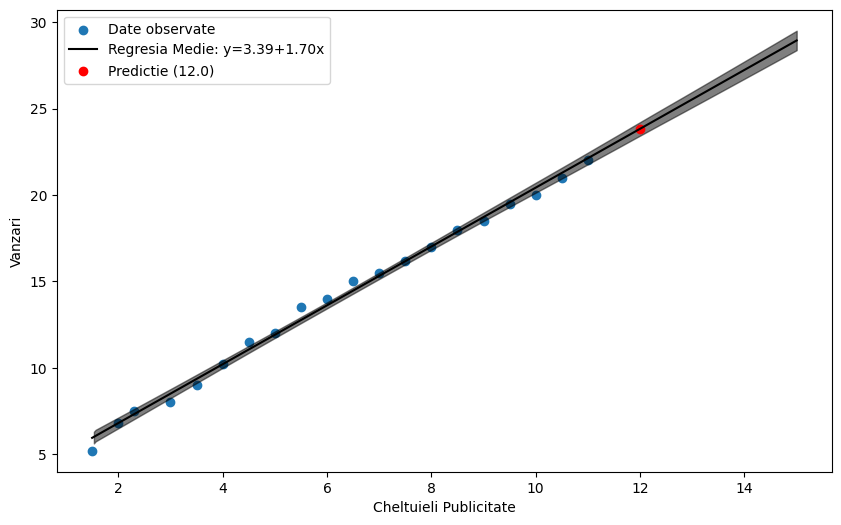

In [11]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

advertising = np.array([1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0])
sales = np.array([5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0])
# a
with pm.Model() as model:

    alpha = pm.Normal('alpha', mu=0, sigma=10)

    beta = pm.Normal('beta', mu=0, sigma=10)

    epsilon = pm.HalfCauchy('epsilon', beta=5)

    mu = pm.Deterministic('mu', alpha + beta * advertising)

    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=sales)

    idata = pm.sample(2000, return_inferencedata=True)

#b si c

summary = az.summary(idata, var_names=['alpha', 'beta', 'epsilon'])
print(summary)
az.plot_posterior(idata, var_names=['alpha', 'beta'], ref_val=0)
plt.show()

posterior = idata.posterior.stack(samples={"chain", "draw"})
alpha_val = posterior['alpha'].values
beta_val = posterior['beta'].values

x_new = 12.0

predicted_values = alpha_val + beta_val * x_new

mean_pred = np.mean(predicted_values)
hdi_pred = az.hdi(predicted_values, hdi_prob=0.94)

print(f"Pentru publicitate = {x_new}:")
print(f" -> Venit estimat (medie): {mean_pred:.2f}")
print(f" -> Interval HDI: {hdi_pred}")

plt.figure(figsize=(10, 6))

plt.scatter(advertising, sales, label='Date observate')

x_range = np.linspace(min(advertising), 15, 100)

alpha_m = posterior['alpha'].mean().item()
beta_m = posterior['beta'].mean().item()
y_mean_line = alpha_m + beta_m * x_range

plt.plot(x_range, y_mean_line, c='k', label=f'Regresia Medie: y={alpha_m:.2f}+{beta_m:.2f}x')

mu_hdi = alpha_val + beta_val * x_range[:, None]
az.plot_hdi(x_range, mu_hdi.T, hdi_prob=0.94, color='k')

plt.scatter([x_new], [mean_pred], c='red', label='Predictie (12.0)')

plt.xlabel('Cheltuieli Publicitate')
plt.ylabel('Vanzari')
plt.legend()
plt.show()